In [1]:
import matplotlib.pyplot as plt
import sarracen as src
import numpy as np

# Final Setup

In [2]:
sdf = src.read_csv('../Data/results/toy_star/final.csv')
dm = 1/sdf.shape[0]
hfact = 1.2

In [3]:
sdf.params={'mass':dm, 'hfact':hfact}
sdf.calc_density()
sdf

,x,y,z,vx,vy,vz,h,u,rho
0,-0.122443,-0.234374,-0.599907,-0.000248,0.000077,0.000143,0.090000,0.015977,0.332772
1,-0.054785,-0.244880,-0.605556,0.000013,-0.000213,0.000212,0.089945,0.015976,0.333383
2,-0.000000,-0.249233,-0.606946,0.000000,-0.000213,0.000331,0.090190,0.015981,0.330678
3,0.054785,-0.244880,-0.605556,-0.000013,-0.000213,0.000212,0.089945,0.015976,0.333383
4,0.122443,-0.234374,-0.599907,0.000248,0.000077,0.000143,0.090000,0.015977,0.332772
...,...,...,...,...,...,...,...,...,...
7118,-0.122443,0.234374,0.599907,-0.000248,-0.000077,-0.000143,0.090000,0.015977,0.332772
7119,-0.054785,0.244880,0.605556,0.000013,0.000213,-0.000212,0.089945,0.015976,0.333383
7120,0.000000,0.249233,0.606946,0.000000,0.000213,-0.000331,0.090190,0.015981,0.330678
7121,0.054785,0.244880,0.605556,-0.000013,0.000213,-0.000212,0.089945,0.015976,0.333383


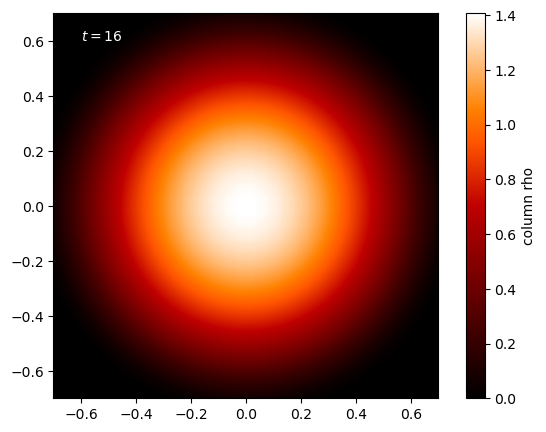

In [4]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sdf.render('rho', ax=ax, rotation=[0,0,0], xlim=[-0.7, 0.7], ylim=[-0.7, 0.7])
ax.set_xticks(np.linspace(-0.6, 0.6, 7))
ax.set_yticks(np.linspace(-0.6, 0.6, 7))
ax.text(-0.6, 0.6, r"$t=16$", color="w")
plt.show()

# Angular Momentum Conservation

In [5]:
# Angular Momentum
def angular_momentum(x, y, z, vx, vy, vz):
    lx = y*vz - z*vy
    ly = z*vx - x*vz
    lz = x*vy - y*vx
    return lx, ly, lz

# Energy
def energy(x, y, z, vx, vy, vz, rho):
    vsq = 0.5 * (vx*vx + vy*vy + vz*vz)
    P = 0.05 * rho*rho
    xsq = 0.5 * (x*x + y*y + z*z)
    return vsq + P + xsq

In [6]:
time = np.loadtxt("../Data/results/toy_star/Time.txt")
time = np.insert(time, 0, [0.0])
T = len(time)
ang_mom = np.zeros(T)
lin_mom = np.zeros(T)
energ = np.zeros(T)

# Initial Conditions

df = src.read_csv("../Data/initial_distribution/toy_star.csv")
df.params={'mass':dm, 'hfact':hfact}
df.calc_density()
L = np.sum(angular_momentum(df['x'], df['y'], df['z'], df['vx'], df['vy'], df['vz']), axis=1)
ang_mom[0] = np.sqrt(L[0]*L[0] + L[1]*L[1] + L[2]*L[2])
vx = np.sum(df['vx'])
vy = np.sum(df['vy'])
vz = np.sum(df['vz'])
lin_mom[0] = np.sqrt(vx*vx + vy*vy + vz*vz)
energ[0] = np.sum(energy(df['x'], df['y'], df['z'], df['vx'], df['vy'], df['vz'], df['rho']))

for ii in range(0, T-1):
    df = src.read_csv('../Data/results/toy_star/' + str(ii) + ".csv")
    df.params={'mass':dm, 'hfact':hfact}
    df.calc_density()
    L = np.sum(angular_momentum(df['x'], df['y'], df['z'], df['vx'], df['vy'], df['vz']), axis=1)
    ang_mom[ii+1] = np.sqrt(L[0]*L[0] + L[1]*L[1] + L[2]*L[2])
    vx = np.sum(df['vx'])
    vy = np.sum(df['vy'])
    vz = np.sum(df['vz'])
    lin_mom[ii+1] = np.sqrt(vx*vx + vy*vy + vz*vz)
    energ[ii+1] = np.sum(energy(df['x'], df['y'], df['z'], df['vx'], df['vy'], df['vz'], df['rho']))

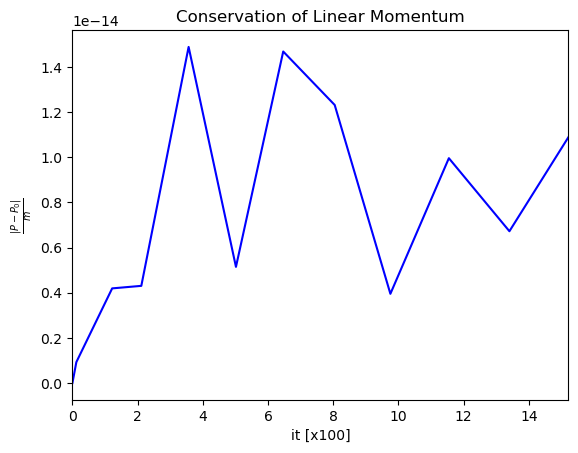

In [7]:
plt.plot(time, np.abs(lin_mom-lin_mom[0]), '-', color='blue')
plt.title("Conservation of Linear Momentum")
plt.xlabel("it [x100]")
plt.ylabel(r"$\frac{|P-P_0|}{m}$")
plt.xlim(0, time[-1])
plt.show()

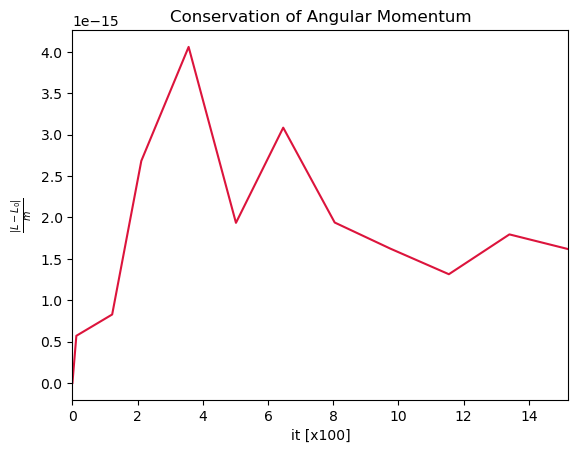

In [8]:
plt.plot(time, np.abs(ang_mom-ang_mom[0]), '-', color='crimson')
plt.title("Conservation of Angular Momentum")
plt.xlabel("it [x100]")
plt.ylabel(r"$\frac{|L-L_0|}{m}$")
plt.xlim(0, time[-1])
plt.show()

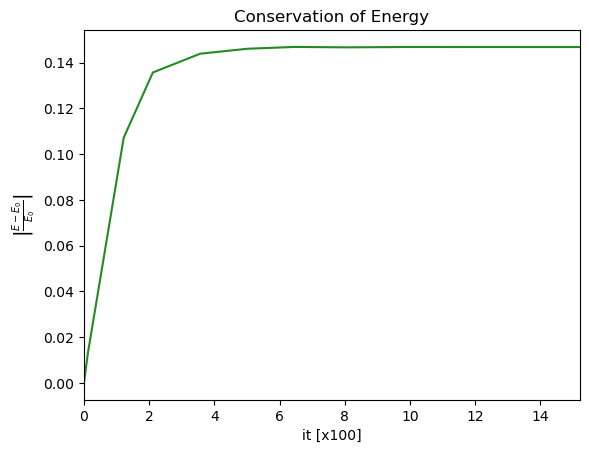

In [9]:
plt.plot(time, np.abs((energ-energ[0])/energ[0]), '-', color='forestgreen')
plt.title("Conservation of Energy")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{E-E_0}{E_0}\right|$")
plt.xlim(0, time[-1])
plt.show()